<a href="https://colab.research.google.com/github/MRazin172/CV_Lab9/blob/main/2348534_CV_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing necessary libraries

In [34]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [35]:
folder_path = "/content/cats"

displaying some randome images from the dataset

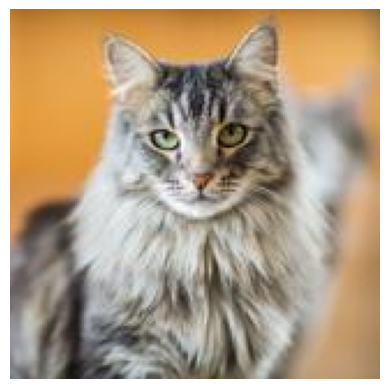

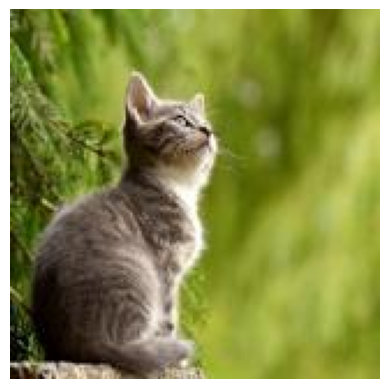

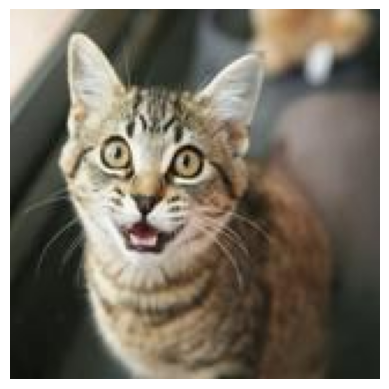

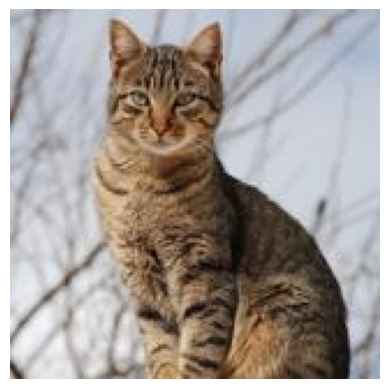

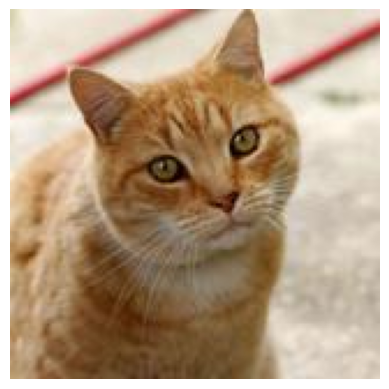

In [36]:
def display_random_images(folder_path, num_images=5):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".png")]

    selected_images = random.sample(image_files, num_images)

    for image_name in selected_images:
        image_path = os.path.join(folder_path, image_name)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
display_random_images(folder_path, num_images=5)


#Preprocessing and Feature Extraction


preprocessing the images we have before extracting feautre from them.

resizing the images to 64*64 size to increase the efficiancy of feature extraction

In [41]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)

    resized_image = cv2.resize(image, (64, 64))

    color_histogram = cv2.calcHist([resized_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_histogram = cv2.normalize(color_histogram, color_histogram).flatten()

    mean_pixel_intensity = np.mean(resized_image)

    height, width, _ = resized_image.shape
    aspect_ratio = width / height

    return color_histogram, mean_pixel_intensity, aspect_ratio, resized_image

here we are trying to extract 3 different features from the dataset,

color histogram tells us the amount of each color present in the image. basically the image has 3 collors red, green and blue.
the color histogram counts the number of pixels of each color intensity in an image.

mean pixel intensity gives us the mean or avg of btightness of the image.
it takes all the pixel intesnities in the image and then finds the avg of them.

aspect ratio is the ratio btw the height and width of the img. compares the size of the image.

#Results

Image: 24.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 107.42496744791667
Aspect Ratio: 1.0


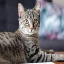


Image: 5.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 106.46126302083333
Aspect Ratio: 1.0


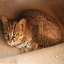


Image: 13.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 192.78466796875
Aspect Ratio: 1.0


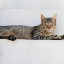


Image: 16.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 193.62508138020834
Aspect Ratio: 1.0


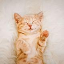


Image: 18.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 127.48079427083333
Aspect Ratio: 1.0


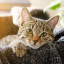


Image: 7.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 119.85929361979167
Aspect Ratio: 1.0


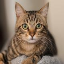


Image: 30.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 118.25016276041667
Aspect Ratio: 1.0


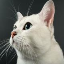


Image: 19.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 148.688232421875
Aspect Ratio: 1.0


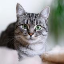


Image: 21.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 141.846923828125
Aspect Ratio: 1.0


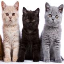


Image: 12.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 148.36539713541666
Aspect Ratio: 1.0


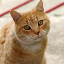


Image: 22.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 152.67195638020834
Aspect Ratio: 1.0


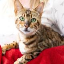


Image: 31.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 70.0068359375
Aspect Ratio: 1.0


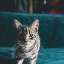


Image: 2.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 146.161865234375
Aspect Ratio: 1.0


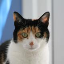


Image: 9.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 69.753173828125
Aspect Ratio: 1.0


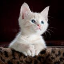


Image: 28.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 132.73527018229166
Aspect Ratio: 1.0


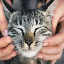


Image: 32.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 113.46793619791667
Aspect Ratio: 1.0


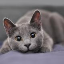


Image: 6.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 162.61092122395834
Aspect Ratio: 1.0


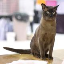


Image: 1.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 112.42537434895833
Aspect Ratio: 1.0


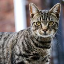


Image: 11.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 149.73030598958334
Aspect Ratio: 1.0


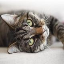


Image: 17.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 115.67032877604167
Aspect Ratio: 1.0


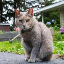


Image: 15.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 150.39713541666666
Aspect Ratio: 1.0


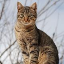


Image: 3.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 116.94840494791667
Aspect Ratio: 1.0


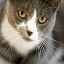


Image: 8.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 104.86930338541667
Aspect Ratio: 1.0


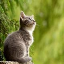


Image: 20.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 121.97957356770833
Aspect Ratio: 1.0


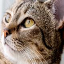


Image: 10.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 108.84659830729167
Aspect Ratio: 1.0


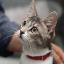


Image: 14.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 110.783447265625
Aspect Ratio: 1.0


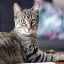


Image: 29.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 113.9990234375
Aspect Ratio: 1.0


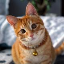


Image: 27.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 102.60091145833333
Aspect Ratio: 1.0


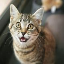


Image: 25.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 80.10009765625
Aspect Ratio: 1.0


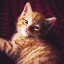


Image: 26.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 148.396240234375
Aspect Ratio: 1.0


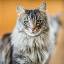


Image: 23.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 128.16910807291666
Aspect Ratio: 1.0


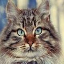


Image: 4.jpg
Color Histogram: (512,)
Mean Pixel Intensity: 83.49983723958333
Aspect Ratio: 1.0


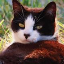

In [46]:
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        image_path = os.path.join(folder_path, filename)
        color_histogram, mean_pixel_intensity, aspect_ratio, image = preprocess_image(image_path)

        if color_histogram is not None and mean_pixel_intensity is not None and aspect_ratio is not None:
            print("Image:", filename)
            print("Color Histogram:", color_histogram.shape)
            print("Mean Pixel Intensity:", mean_pixel_intensity)
            print("Aspect Ratio:", aspect_ratio)

            cv2_imshow(image)
            print()

displaying the image, its name, its color hsitogram, the mean pixe intensity and its aspect ratio